In [26]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from datetime import timedelta


In [27]:
os.getcwd()
os.chdir('C:\\Users\\IMEN\\Documents\\openclassroom\\formation openclassrooms\\projet5')

### 1.Présentation des données

In [28]:
csv_files = glob.glob(os.path.join('datasets', "*.csv"))
csv_files

['datasets\\olist_customers_dataset.csv',
 'datasets\\olist_geolocation_dataset.csv',
 'datasets\\olist_orders_dataset.csv',
 'datasets\\olist_order_items_dataset.csv',
 'datasets\\olist_order_payments_dataset.csv',
 'datasets\\olist_order_reviews_dataset.csv',
 'datasets\\olist_products_dataset.csv',
 'datasets\\olist_sellers_dataset.csv',
 'datasets\\product_category_name_translation.csv']

In [29]:
#9 dataframe (df1..df9)
for i in range(len(csv_files)):   
    data=pd.read_csv(csv_files[i])
    globals()[f'df{i+1}'] =data
    

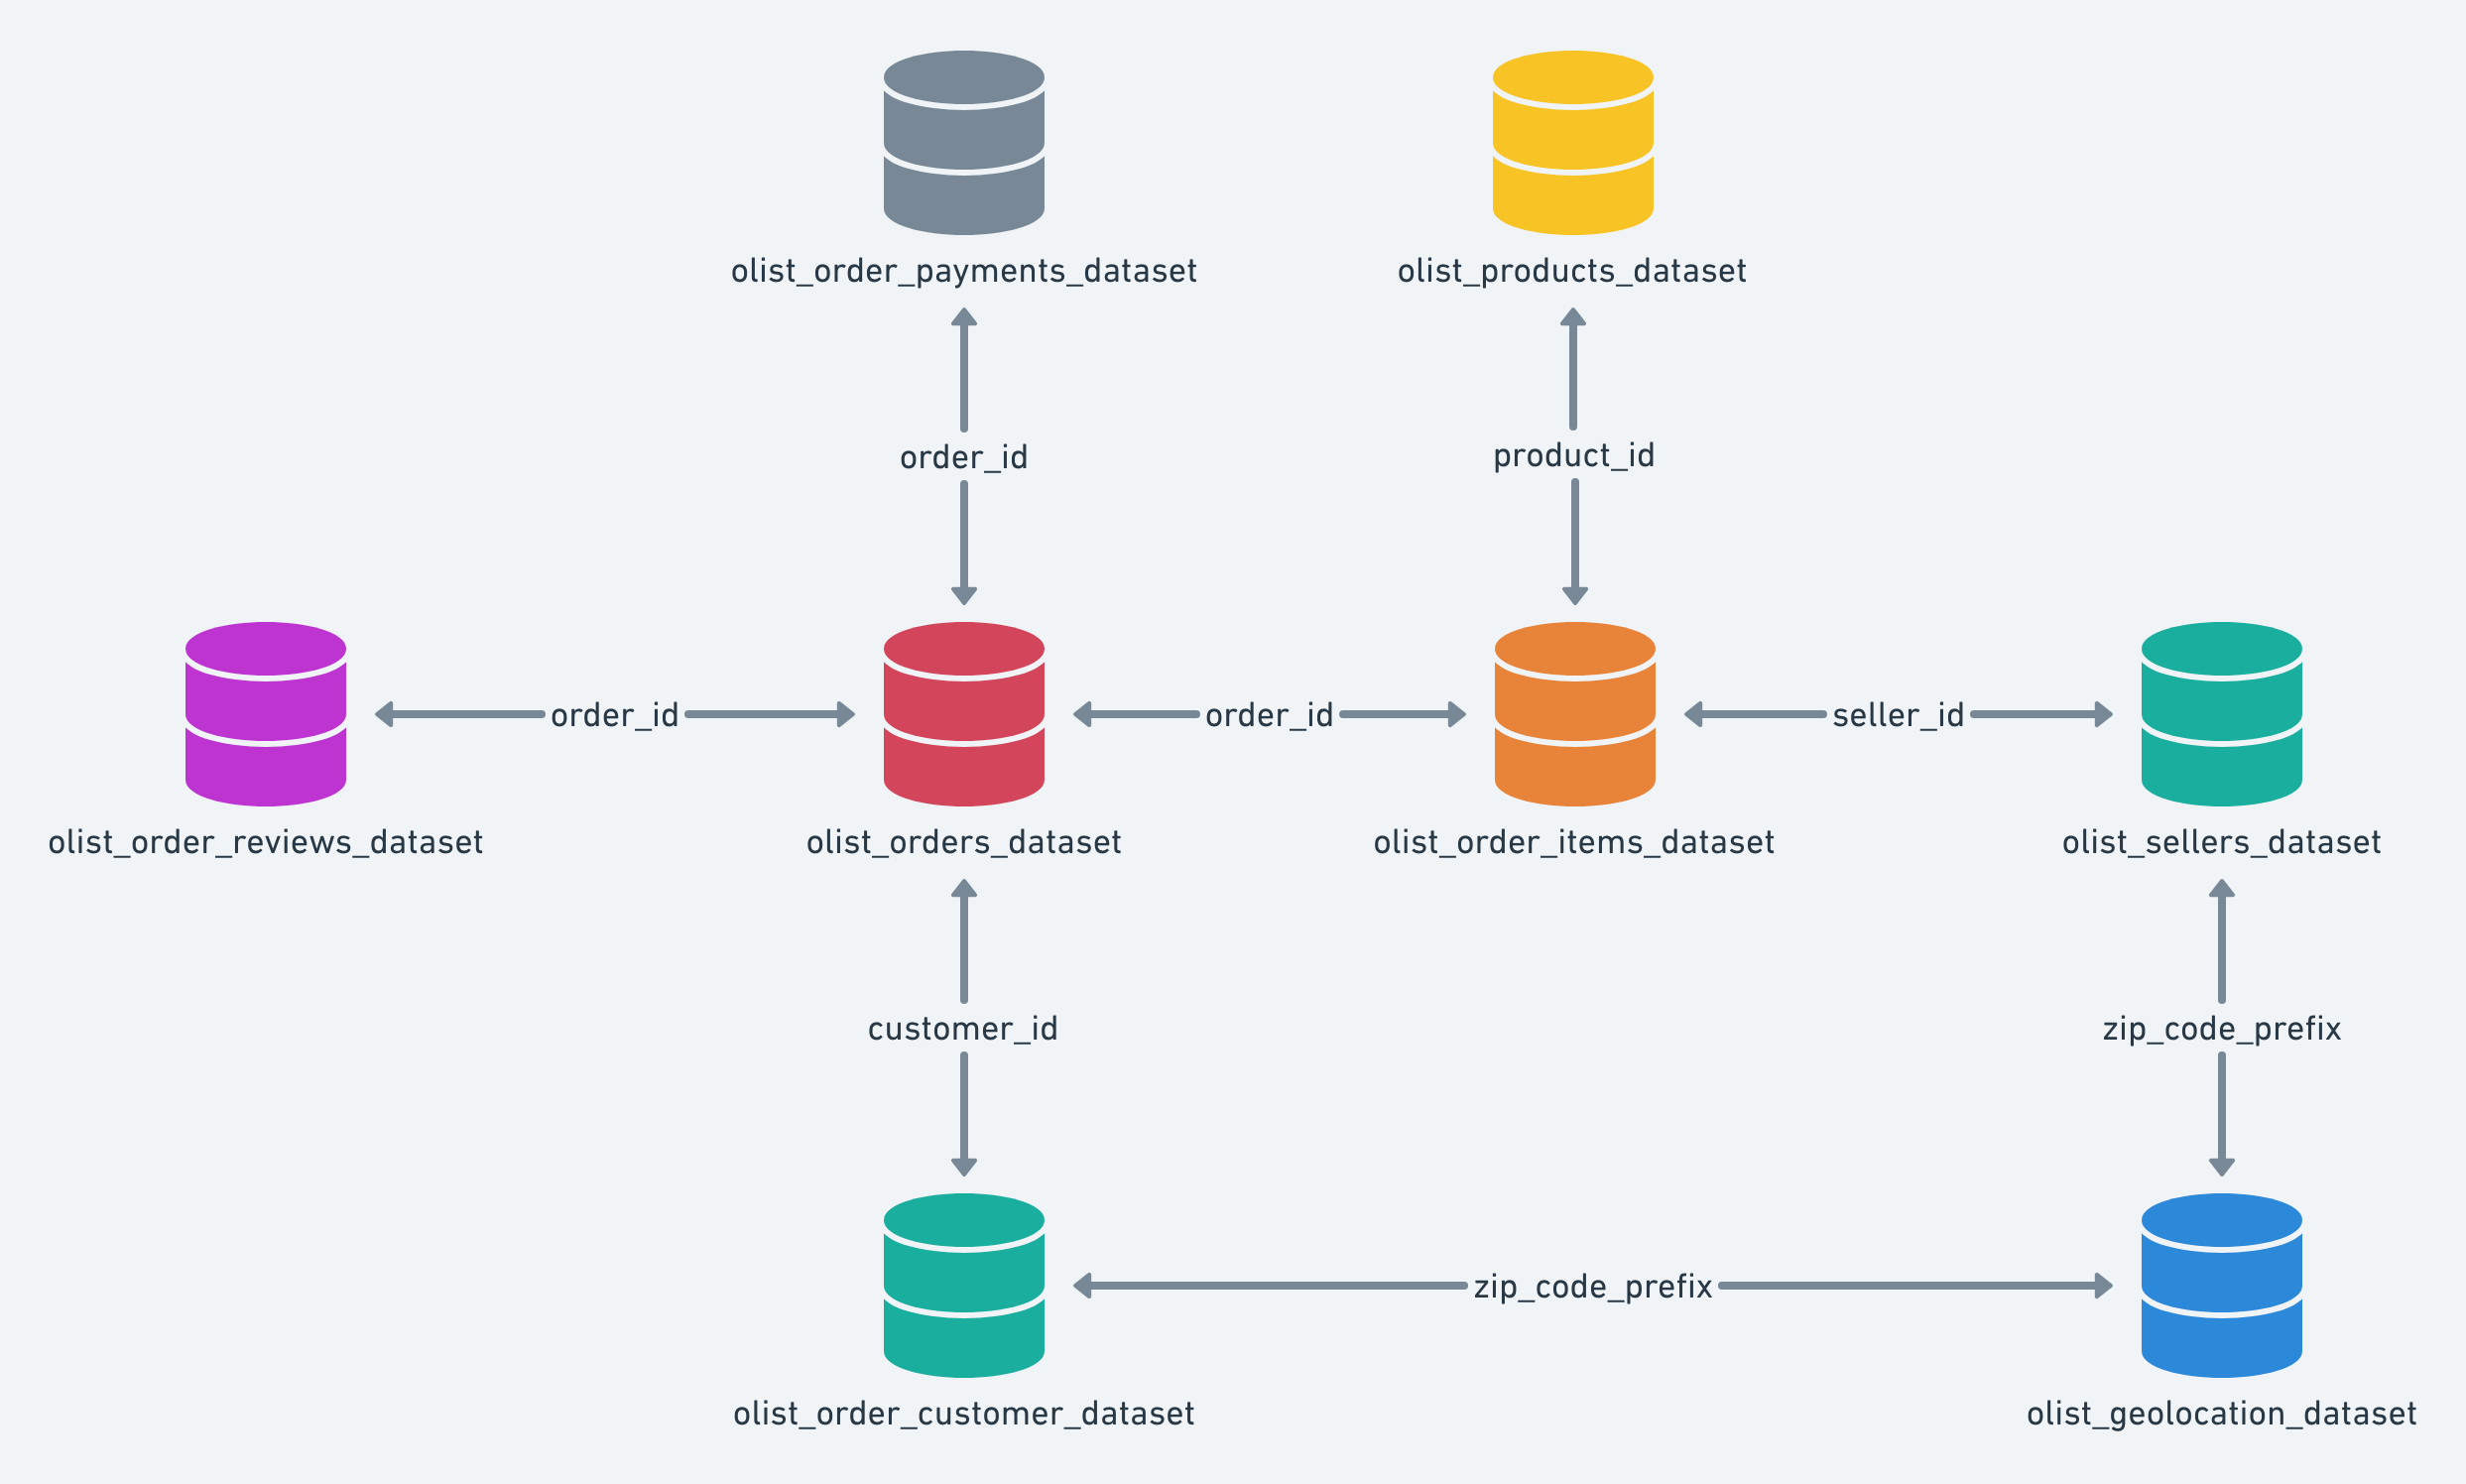

In [30]:
from IPython.display import Image
Image(filename='HRhd2Y0.png',width = 600, height = 600)

In [31]:
datasets=['olist_customers_dataset','olist_geolocation_dataset','olist_orders_dataset',
 'olist_order_items_dataset.csv','olist_order_payments_dataset','olist_order_reviews_dataset',
 'olist_products_dataset','olist_sellers_dataset']
Descriptions=['informations sur le client et son emplacement',
             ' informations sur les codes postaux brésiliens et leurs coordonnées','indormations sur les commandes',
             'données sur les articles achetés dans chaque commande','données sur les options de paiement des commandes',
             'données sur les évaluations faites par les clients',
             'données sur les produits vendus par Olist','données sur les vendeurs qui ont exécuté les commandes passées sur Olist']
dic={'Variable':['df1','df2','df3','df4','df5','df6','df7','df8'],'Dataset': datasets, 'Description': Descriptions}
data_description=pd.DataFrame(dic)
data_description

,Variable,Dataset,Description
0,df1,olist_customers_dataset,informations sur le client et son emplacement
1,df2,olist_geolocation_dataset,informations sur les codes postaux brésiliens...
2,df3,olist_orders_dataset,indormations sur les commandes
3,df4,olist_order_items_dataset.csv,données sur les articles achetés dans chaque c...
4,df5,olist_order_payments_dataset,données sur les options de paiement des commandes
5,df6,olist_order_reviews_dataset,données sur les évaluations faites par les cli...
6,df7,olist_products_dataset,données sur les produits vendus par Olist
7,df8,olist_sellers_dataset,données sur les vendeurs qui ont exécuté les c...


In [32]:
ds=[df1,df2,df3,df4,df5,df6,df7,df8]

In [33]:

for d in ds:
    print(d.columns)
    print('-'*20)
    print(d.describe())
    print('*'*100)

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
--------------------
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
****************************************************************************************************
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')
--------------------
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min      

#### Dataframes et valeurs nulles

In [34]:
#msno.bar(df1):ok
#msno.bar(df2):ok
#msno.bar(df3)#contient des nan
#msno.bar(df4)#ok
#msno.bar(df5)#ok
#msno.bar(df6)#contient des nan
#msno.bar(df7)#contient des nan
#msno.bar(df8)#ok

In [35]:
#supprimer les lignes contenant des nan
df3.dropna(axis=0,inplace=True)
df7.dropna(axis=0,inplace=True)
#pour df6 les colonnes contenant des nan sont review_comment_title et review_content_message ==>je supprime ces deux colonnes
df6.dropna(axis=1,inplace=True)

In [36]:

for d in ds:
    print(d.columns)
    print('\n')



Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')


Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')


Index(['review_id', 'order_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')


Index(['product_id', 'product_category_name', 'product_name_lenght',
  

#### Dataframes et lignes dupliquées

In [37]:
#print('Entrées dupliquées: {}'.format(df1.duplicated().sum()))#0
print('Entrées dupliquées: {}'.format(df2.duplicated().sum()))
df2.drop_duplicates(inplace = True)
#print('Entrées dupliquées: {}'.format(df3.duplicated().sum()))#0
#print('Entrées dupliquées: {}'.format(df4.duplicated().sum()))#0
#print('Entrées dupliquées: {}'.format(df5.duplicated().sum()))#0
#print('Entrées dupliquées: {}'.format(df6.duplicated().sum()))#0
#print('Entrées dupliquées: {}'.format(df7.duplicated().sum()))#0
#print('Entrées dupliquées: {}'.format(df8.duplicated().sum()))#0

Entrées dupliquées: 261831


#### Dataframes et suppression de lignes

In [38]:
#supprimer les commnandes annulées et non valables
df3=df3[df3.order_status!='canceled']
df3=df3[df3.order_status!='unavailable']

In [39]:
df3.order_status.unique()

array(['delivered'], dtype=object)

### Analyse exploratoire

#### Nombre de commande par clients

In [40]:
#nbre de commandes par client
nb_order_per_customer=pd.DataFrame(df1.groupby('customer_unique_id')['customer_id'].count())\
.rename(columns={'customer_id':'Nb'}).reset_index()
nb_order_per_customer

,customer_unique_id,Nb
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,1
96092,fffea47cd6d3cc0a88bd621562a9d061,1
96093,ffff371b4d645b6ecea244b27531430a,1
96094,ffff5962728ec6157033ef9805bacc48,1


In [41]:
#Clients avec plusieurs commandes
customer_with_many_orders=nb_order_per_customer[nb_order_per_customer['Nb']>1]
per_cust_with_many_orders=round(100*customer_with_many_orders.shape[0]/nb_order_per_customer.shape[0],2)
print(f'{per_cust_with_many_orders} % des clients ayant réalisés plusieurs commandes')

3.12 % des clients ayant réalisés plusieurs commandes


In [42]:
#Clients avec une seule commande
customer_with_one_order=nb_order_per_customer[nb_order_per_customer['Nb']==1]
per_cust_with_one_order=round(100*customer_with_one_order.shape[0]/nb_order_per_customer.shape[0],2)
print(f'{per_cust_with_one_order} % des clients ayant réalisés une seule commande')

96.88 % des clients ayant réalisés une seule commande


In [43]:
df12=df2.join(df1.set_index(['customer_zip_code_prefix','customer_city','customer_state']), on=['geolocation_zip_code_prefix', 'geolocation_city','geolocation_state'], how='right')
df12

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,customer_id,customer_unique_id
334422,14409,-20.509897,-47.397866,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
334449,14409,-20.497396,-47.399241,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
334459,14409,-20.510459,-47.399553,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
334462,14409,-20.480940,-47.394161,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
334463,14409,-20.515413,-47.398194,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
...,...,...,...,...,...,...,...
174120,6703,-23.598092,-46.904582,cotia,SP,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398
174153,6703,-23.594171,-46.908091,cotia,SP,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398
174253,6703,-23.599369,-46.905603,cotia,SP,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398
174263,6703,-23.584425,-46.892014,cotia,SP,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398


In [44]:
# Géolocalisation des clients
# map = folium.Map()
# map = folium.Map(location=[df12['geolocation_lat'].mean(), df12['geolocation_lng'].mean()],zoom_start=10)
# for i in range(0,len(df12)):
#     folium.Circle([df12.iloc[i]['geolocation_lat'],df12.iloc[i]['geolocation_lng']], 
#                       popup=df12.iloc[i]['geolocation_city'], radius =100).add_to(map)
# map

#### Montants des commandes

In [45]:
df4.price.describe()#Pour vérifier s'il ya des prix négatifs

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

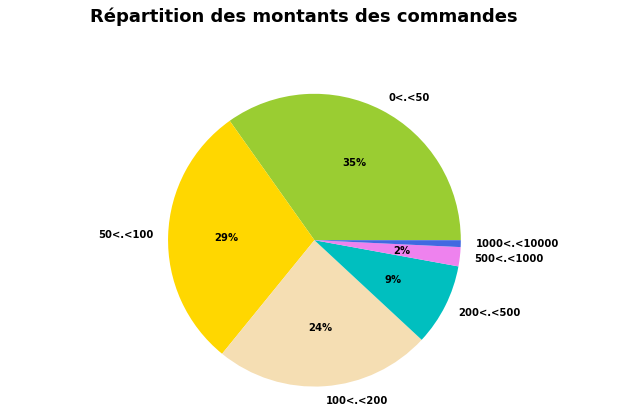

In [46]:
#____________________
# Décompte des achats
price_range = [0, 50, 100, 200, 500, 1000, 10000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = df4[(df4.price < price) &
                       (df4.price > price_range[i-1])]['price'].count()
    count_price.append(val)
#____________________________________________
# Représentation du nombre d'achats / montant        
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]

ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Répartition des montants des commandes", ha='center', fontsize = 18);

#### Catégories des produits

In [47]:
df7.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [48]:
#Distribution des catégories des produits 
product_category=pd.DataFrame(df7.groupby('product_category_name')['product_category_name'].count().reset_index(name='counts'))
product_category=product_category.sort_values(by='counts',ascending=True)
product_category

,product_category_name,counts
17,cds_dvds_musicais,1
67,seguros_e_servicos,2
60,pc_gamer,3
37,fashion_roupa_infanto_juvenil,5
15,casa_conforto_2,5
...,...,...
72,utilidades_domesticas,2335
11,beleza_saude,2444
54,moveis_decoracao,2657
32,esporte_lazer,2867


Text(0.5, 1.0, 'Distribution des catégories de produits')

<Figure size 1512x2880 with 0 Axes>

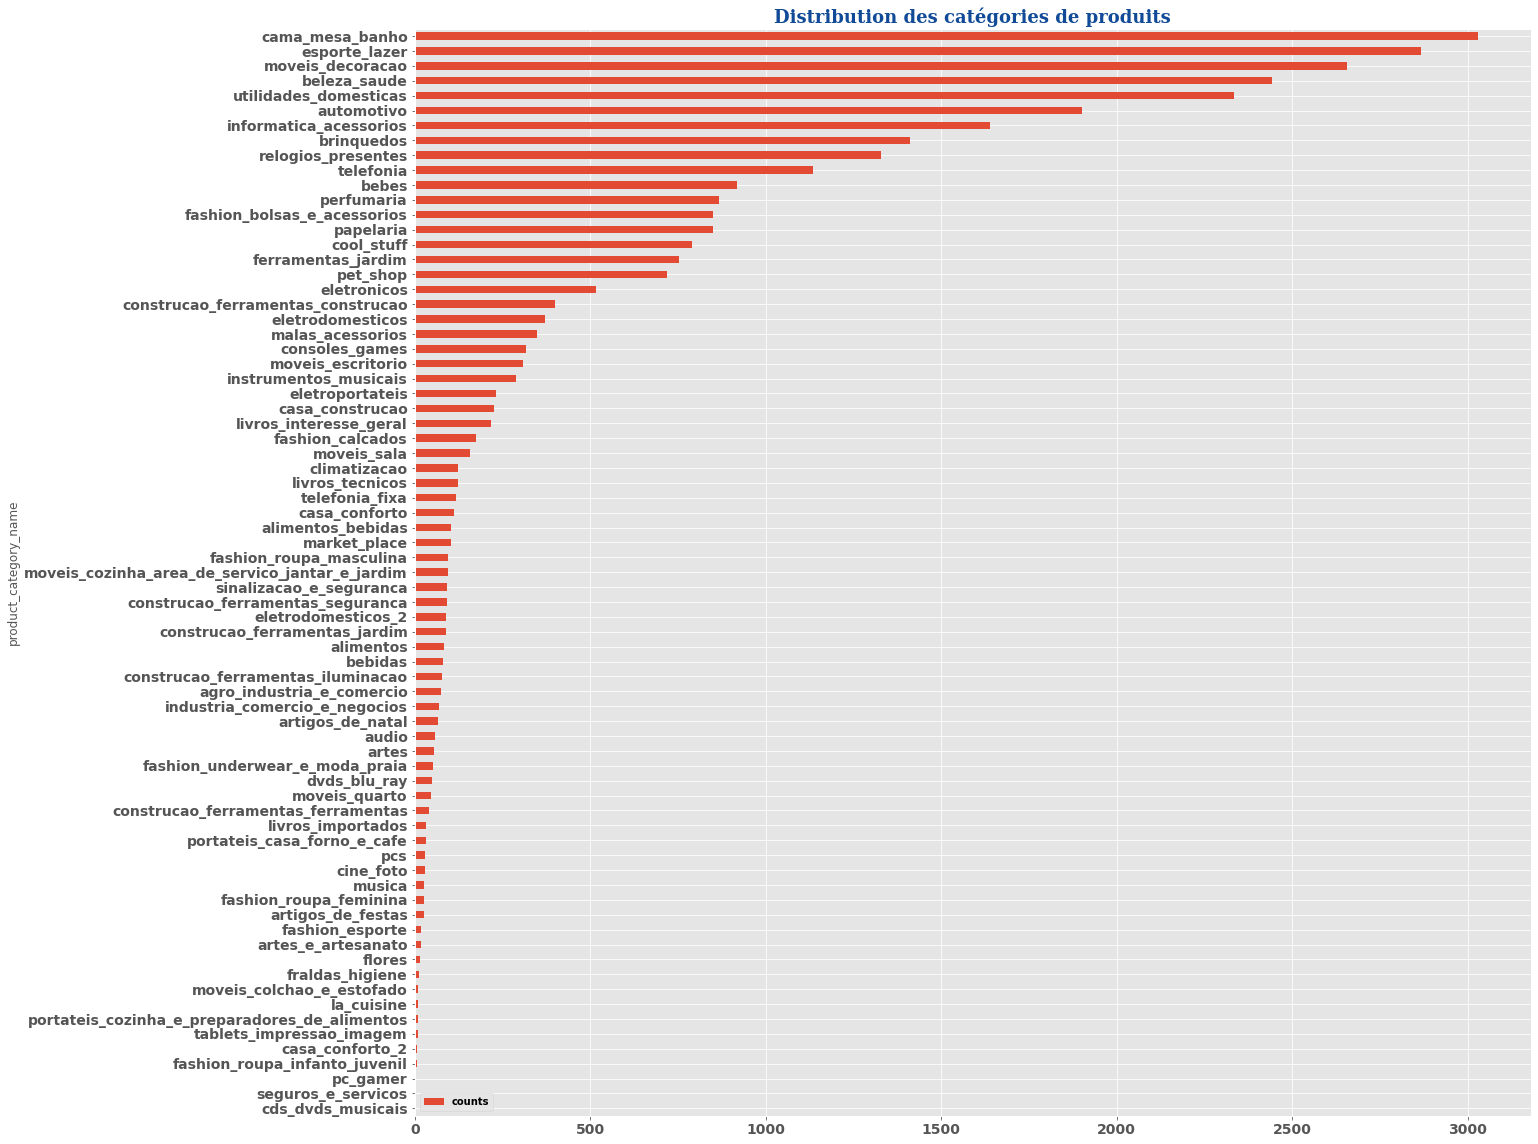

In [49]:
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.style.use('ggplot')

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }
fig = plt.figure(figsize=(21,40))
product_category.plot( y='counts', x='product_category_name',kind='barh',figsize=(20,20))
plt.title('Distribution des catégories de produits',fontdict=font_title)


#### Création du datset commandes

In [50]:
#Ici on crée un dataset nommée commande_dataset contenant toute les information d'une commande

#jointure entre df1 et df3 (dataset products et dataset order)
df13=pd.merge(df1,df3,on='customer_id')
df13=df13[['customer_id', 'customer_unique_id','customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp']]
#df13.head()

In [51]:

df134=pd.merge(df13,df4,on='order_id')
df134=df134[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp', 'order_item_id',
       'product_id', 'seller_id','price']]
#df134.head()

In [52]:

df1345=pd.merge(df134,df5,on='order_id')
df1345=df1345[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'price','payment_type']]
#df1345.head()

In [53]:
df13456=pd.merge(df1345,df6,on='order_id')
df13456=df13456[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'price', 'payment_type', 'review_id',
       'review_score']]
#df13456.head()

In [54]:
df134567=pd.merge(df13456,df7,on='product_id')
df134567=df134567[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'price', 'payment_type', 'review_id',
       'review_score', 'product_category_name']]
#df134567.head()

In [55]:
df1345678=pd.merge(df134567,df8,on='seller_id')
#df1345678.columns

In [56]:
commandes=df1345678

<AxesSubplot:>

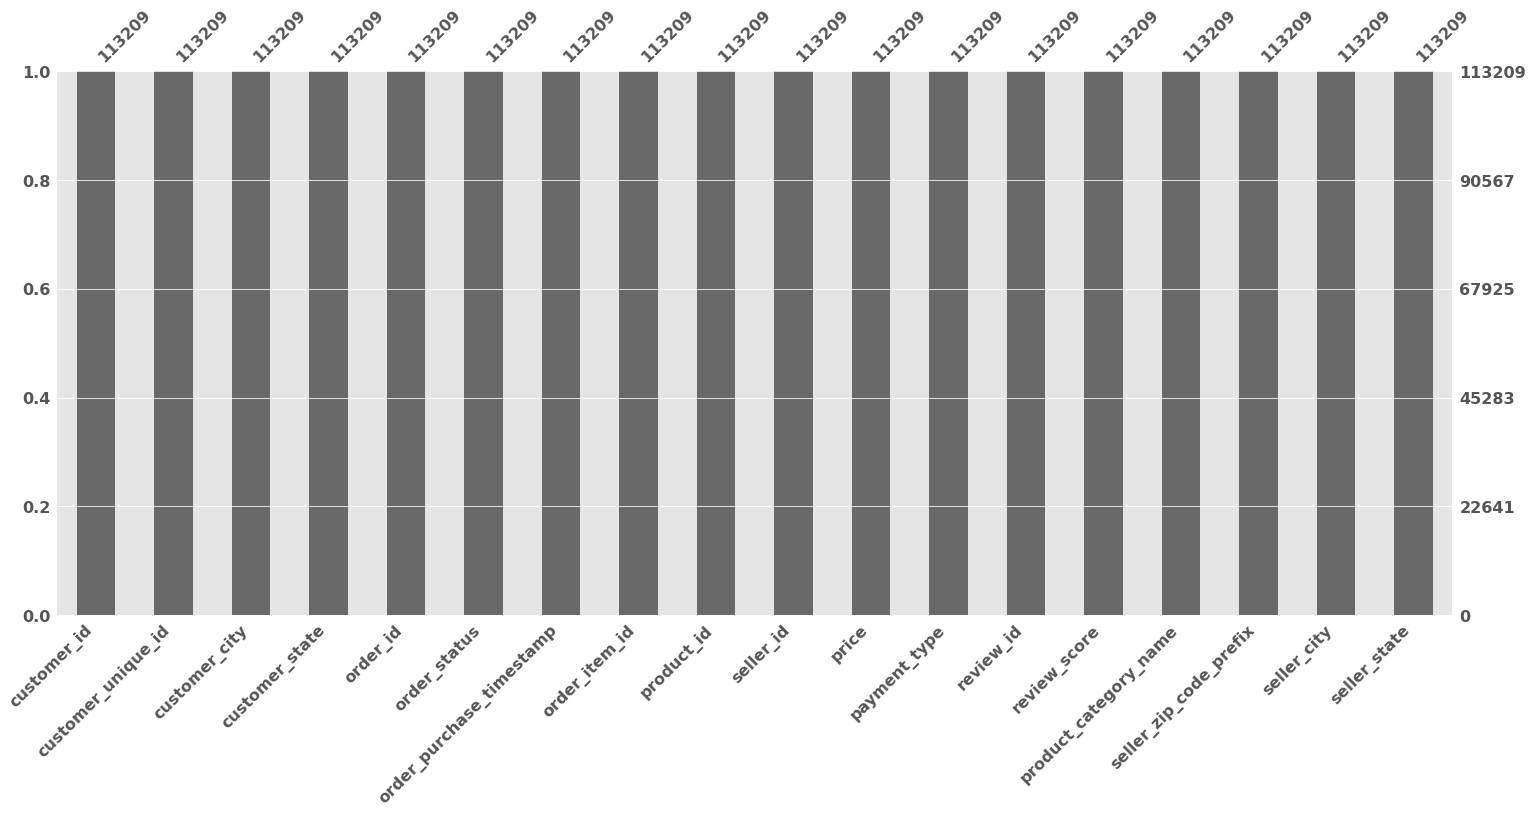

In [57]:
msno.bar(commandes)

## Sauvegarde des données

In [58]:
#print('Entrées dupliquées: {}'.format(commandes.duplicated().sum()))
commandes.drop_duplicates(inplace = True)

Entrées dupliquées: 2364


In [59]:
#Ici je vais garder le data set localisation df2
df2.to_csv('geolocalisation_dataset.csv',index=False)
commandes.to_csv('commandes_dataset.csv',index=False)
#df2.to_csv('geolocalisation_dataset.csv', sep='\t',index=False)